# Projekt zaliczeniowy SQL, Symulacje, Imputacja danych

Autor: Paweł Kawecki;
Kierunek: Informatyka i ekonometria II st. niest;
Rok akademicki: 2021/22;
Numer indeks: 282 639

Wykorzystane dane w pracy pochodzą ze strony kaggle, a dokładnie:https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset. Dane odnoszą się do informacji o transakcjach przeprowadzonych na rynku nieruchomości w USA. Informacje zawarte w zbiorze danych to status,cena, liczba sypialni, liczba łazienek, powierzchnia działki, adres, ulica, miasto, stan, kod pocztowy, powierzchnia mieszkania, data sprzedaży. 

# SQL

Poniżej przedstawiony jest kod w języku SQL, który posłużył do wyciągnięcia podstawowych informacji o badanym zbiorze danych

In [1]:
SELECT * 
FROM Projekt_zal.dbo.Real_estate

--Sprawdzenie braku danych w każdej kolumnie

SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE price IS NULL

SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE bed IS NULL

SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE price IS NULL

SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE acre_lot IS NULL

SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE full_address IS NULL

SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE street IS NULL

--Jeden brak dla city - trzeba uzupełnić po weryfikacji o miasto Hopewell Junction
SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE city IS NULL

SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE state IS NULL

SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE zip_code IS NULL

SELECT *
FROM Projekt_zal.dbo.Real_estate
WHERE house_size IS NULL



--Uzupełnienie informacji po weryfikacji po zmiennej street
--Sprawdzenie przed uaktualnianiem informacji
SELECT * FROM Projekt_zal.dbo.Real_estate 
where street = '641 State Route 82'

UPDATE Projekt_zal.dbo.Real_estate
SET city = 'Hopewell Junction'
WHERE street = '641 State Route 82'

SELECT * FROM 
Projekt_zal.dbo.Real_estate
WHERE city = 'Hopewell Junction'

--Analiza informacji w naszym zbiorze danych


--Cała tabela
SELECT * 
FROM Projekt_zal.dbo.Real_estate

--Lista 121 występujących miast dwuczłonowych

SELECT DISTINCT city
FROM Projekt_zal.dbo.Real_estate
WHERE city LIKE '% %' OR city LIKE '%-%'


--Liczba wystąpień stanów oraz miast z pierwszą literą alfabetu

SELECT LEFT(state,1) as Alphabet,COUNT(*) as 'Liczba_wystapien'
FROM Projekt_zal.dbo.Real_estate
GROUP BY LEFT(state,1)
ORDER BY Liczba_wystapien DESC

SELECT LEFT(city,1) as Alphabet,COUNT(*) as 'Liczba_wystapien'
FROM Projekt_zal.dbo.Real_estate
GROUP BY LEFT(city,1)
ORDER BY Liczba_wystapien DESC


--Miasta zaczynające się na w różnych przedziałach alfabetu

SELECT DISTINCT city 
FROM Projekt_zal.dbo.Real_estate  
WHERE city LIKE '[h-o]%'

  
SELECT DISTINCT state 
FROM Projekt_zal.dbo.Real_estate
WHERE Rtrim(state) NOT LIKE '%[a-p]'

-- Albo 
SELECT DISTINCT state
FROM Projekt_zal.dbo.Real_estate
WHERE Rtrim(state) LIKE '%[^a-p]'

--Top 10 wystąpień miast oraz stanów

SELECT top 10 city, COUNT(*) as 'liczba_wystapien_miast'
FROM Projekt_zal.dbo.Real_estate
Group By city
Order By COUNT(*) DESC

SELECT top 10 state, COUNT(*) as 'liczba_wystapien_stanow'
FROM Projekt_zal.dbo.Real_estate
Group By state
Order By COUNT(*) DESC 

SELECT city, COUNT(*) as 'liczba_wystapien_miast'
FROM Projekt_zal.dbo.Real_estate
Group By city
Order By COUNT(*) DESC

--Wprowadzenie kolumny z wyliczeniami z akrów na m2

SELECT price, bed, bath, acre_lot, city, acre_lot*4046 as 'm2'
FROM Projekt_zal.dbo.Real_estate


--Średnia cena nieruchomości dla ilości łazienek, sypialni

SELECT bed, ROUND(AVG(price),2) AS 'Srednia_cena_mieszkania'
FROM Projekt_zal.dbo.Real_estate
Group by bed
ORDER BY bed ASC

--Średnia cena nieruchoości dla ilosci łazienek oraz przeliczenie ceny na ilość pomieszczeń

SELECT bath, ROUND(AVG(price),2) AS 'Srednia_cena_mieszkania', ROUND(AVG(price),2)/bath as 'Cena za sypialnie'
FROM Projekt_zal.dbo.Real_estate
Group by bath
ORDER BY bath ASC


--Maksymalna, minimalna i średnia wartość zmiennej Price

SELECT MAX(price) as 'Maks_price' , min(price) as 'Min_price', ROUND(AVG(price),2) as 'Srednia_price'
FROM Projekt_zal.dbo.Real_estate


-- Top 10 stanów z liczbą nieruchomości poniżej średniej

SELECT TOP 10 state, COUNT(*) as 'liczba_nieruchomości'
FROM Projekt_zal.dbo.Real_estate
WHERE price < 858629
Group By state
Order By COUNT(*) DESC 

--Top 10 stanów z liczbą nieruchomości powyżej średniej

SELECT TOP 10 state, COUNT(*) as 'liczba_nieruchomości'
FROM Projekt_zal.dbo.Real_estate
WHERE price > 858629
Group By state
Order By COUNT(*) DESC

-- Średnia, minimalna oraz maksymalna cena nieruchomości z podziałem na stan oraz miasto

SELECT state, ROUND(AVG(price),2) as 'Srednia_wartosc_nier', max(price) as 'Maksymalna_cena', min(price) as 'Minimalna_cena', Round(AVG(house_size),2) as 'Srd_Pow_nier'
FROM Projekt_zal.dbo.Real_estate
Group by state
Order by AVG(price) DESC

SELECT city, ROUND(AVG(price),2) as 'Srednia_wartosc_nier', max(price) as 'Maksymalna_cena', min(price) as 'Minimalna_cena', Round(AVG(house_size),2) as 'Srd_Pow_nier'
FROM Projekt_zal.dbo.Real_estate
Group by city
Order by AVG(price) DESC

-- Maksymalna, minimalna oraz średnia powierzchnia nieruchomości

SELECT min(house_size) as 'min_pow' , max(house_size) as 'max_pow' , Round(avg(house_size),2) as 'sred_pow'
FROM Projekt_zal.dbo.Real_estate

--Lista obiektów z powierzchnią pomiędzy 1000 a 2500.

SELECT *  
FROM Projekt_zal.dbo.Real_estate
WHERE house_size BETWEEN 1000 AND 2500

--Średnia cena za powierzchnię na unikatowych ulicach

SELECT Distinct street, city, state, house_size, Round(price/house_size,2) as 'Srednia_cena_za_m2'
From Projekt_zal.dbo.Real_estate
Order by Round(price/house_size,2) DESC"



SyntaxError: invalid syntax (<ipython-input-1-21185b096c8e>, line 1)

# Symulacja

Celem tej części pracy jest przeprowadzenie i przedstawienie odbiorcy możliwości wykorzystania symulacji oraz przykładowych sposóbów podejścia do procesu symulowania danych. W tej części będziemy działać na wyczyszczonym z braków zbiorze danych, który później poprzez symulacje zostanie uzupełniony wartościami null i poprzez kolejną symulację dojdzie do wypełnienia wartości, co finalnie ma pozwolić na podsumowanie różnic pomiędzy wynikami prawdziwymi a wynikami zasymulowanymi.

In [3]:
import pandas as pd
from random import sample
import random
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('real_estate_USA.xlsx')
df = df[['price', 'bed', 'bath', 'acre_lot' ,'house_size']]

In [4]:
#Usuwanie braków danych
df_no_na = df.dropna()
df_with_na = df.dropna()

In [5]:
#Tabela bez braków danych
df_no_na

,price,bed,bath,acre_lot,house_size
0,105000,3.0,2.0,0.12,920.0
1,80000,4.0,2.0,0.08,1527.0
2,67000,2.0,1.0,0.15,748.0
3,145000,4.0,2.0,0.10,1800.0
5,179000,4.0,3.0,0.46,2520.0
...,...,...,...,...,...
202983,2500000,3.0,2.0,0.62,1536.0
202984,1995000,1.0,1.0,0.05,700.0
202985,3495000,6.0,5.0,1.22,5302.0
202987,2999000,3.0,4.0,0.36,2314.0


In [6]:
display(df.isna().sum(), df_no_na.isna().sum())

price             0
bed           31101
bath          30229
acre_lot      52038
house_size    29610
dtype: int64

price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

**Symulacja imputacji braków zmiennych**

In [7]:
#Lista kolumn 
set1 = {0,1, 2, 3, 4}

In [8]:
#Kod symulacji uzupełnienia 10 000  komórek pustymi wartościami
try:
    counter = 0
    while counter < 10001:
        b = sample(set1,1)
        a = random.sample(range(1, 120000), 1)
        df_no_na.iloc[a,b] = np.nan
        counter = counter + 1
except Exception:
    pass


<ipython-input-8-22dcb0d817c8>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  b = sample(set1,1)
c:\users\paweł\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
df_no_na.isna().sum()

price         1985
bed           1986
bath          2000
acre_lot      2015
house_size    1941
dtype: int64

In [10]:
df_with_na.isna().sum()

price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

Powyżej zastosowana została symulacja stochastyczna imputacji wartości Nan. Braki danych zostały zaimputowane w sposób losowy dla 10 000 komórek.

**Symulacja imputacji wartości w braki danych**

In [11]:
df_no_na.isna().sum()

price         1985
bed           1986
bath          2000
acre_lot      2015
house_size    1941
dtype: int64

Powyżej przedstawiona została liczba braków wartości dla poszczególnych kolumn w naszym zbiorze danych. Celem tej części jest imputacja wartości losowych, które będą brane z przedziały kwantyli 30% oraz 97%.

In [12]:
x1 = int(df_with_na['price'].quantile(0.30))
x2 = int(df_with_na['price'].quantile(0.97))
x3 = int(df_with_na['bed'].quantile(0.30))
x4 = int(df_with_na['bed'].quantile(0.97))
x5 = int(df_with_na['bath'].quantile(0.30))
x6 = int(df_with_na['bath'].quantile(0.97))
x7 = int(df_with_na['acre_lot'].quantile(0.30))
x8 = int(df_with_na['acre_lot'].quantile(0.97))
x9 = int(df_with_na['house_size'].quantile(0.30))
x10 = int(df_with_na['house_size'].quantile(0.97))

In [13]:
list_1 = np.where(df_no_na['price'].isnull())[0]
list_2 = np.where(df_no_na['bed'].isnull())[0]
list_3 = np.where(df_no_na['bath'].isnull())[0]
list_4 = np.where(df_no_na['acre_lot'].isnull())[0]
list_5 = np.where(df_no_na['house_size'].isnull())[0]
list_1_got = list_1.tolist()
list_2_got = list_2.tolist()
list_3_got = list_3.tolist()
list_4_got = list_4.tolist()
list_5_got = list_5.tolist()

In [14]:
#Imputacja losowych wartości do komórek wcześniej uzupełnionych Nan
for i in list_1_got:
    a = random.sample(range(x1, x2), 1)
    df_no_na.iloc[i,0] = a
for i in list_2_got:
    a = random.sample(range(x3, x4), 1)
    df_no_na.iloc[i,1] = a
for i in list_3_got:
    a = random.sample(range(x5, x6), 1)
    df_no_na.iloc[i,2] = a
for i in list_4_got:
    a = random.sample(range(x7, x8), 1)
    df_no_na.iloc[i,3] = a
for i in list_5_got:
    a = random.sample(range(x9, x10), 1)
    df_no_na.iloc[i,4] = a 

c:\users\paweł\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [15]:
#Potwierdzenie uzupełnienia braków
df_no_na.isna().sum()

price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

In [16]:
#Porównanie wartości realnych z wartościami symulowanymi w sposób losowy
a_list = []
b_list = []
c_list = []
for i in list_1_got:
    a_list.append(df_with_na.iloc[i,0])
    b_list.append(df_no_na.iloc[i,0])
    c_list.append(df_with_na.iloc[i,0]- df_no_na.iloc[i,0])

In [17]:
df_list_1 = pd.DataFrame({'Realne': a_list, 'Symulacja': b_list, 'Różnica': c_list})
print(f'Wartość średniej różnicy zmiennej price wyniosła: {df_list_1.Różnica.mean()}')

Wartość średniej różnicy zmiennej price wyniosła: -1287399.696725441


In [18]:
a_list = []
b_list = []
c_list = []
for i in list_2_got:
    a_list.append(df_with_na.iloc[i,1])
    b_list.append(df_no_na.iloc[i,1])
    c_list.append(df_with_na.iloc[i,1]- df_no_na.iloc[i,1])
    
df_list_2 = pd.DataFrame({'Realne': a_list, 'Symulacja': b_list, 'Różnica': c_list})
print(f'Wartość średniej różnicy bed wyniosła: {df_list_2.Różnica.mean()}')


Wartość średniej różnicy bed wyniosła: -1.4144008056394763


In [19]:
for i in list_3_got:
    a_list.append(df_with_na.iloc[i,2])
    b_list.append(df_no_na.iloc[i,2])
    c_list.append(df_with_na.iloc[i,2]- df_no_na.iloc[i,2])
    
df_list_3 = pd.DataFrame({'Realne': a_list, 'Symulacja': b_list, 'Różnica': c_list})
print(f'Wartość średniej różnicy bath wyniosła: {df_list_3.Różnica.mean()}')

Wartość średniej różnicy bath wyniosła: -1.2762167586552935


In [20]:
for i in list_4_got:
    a_list.append(df_with_na.iloc[i,3])
    b_list.append(df_no_na.iloc[i,3])
    c_list.append(df_with_na.iloc[i,3]- df_no_na.iloc[i,3])
    
df_list_4 = pd.DataFrame({'Realne': a_list, 'Symulacja': b_list, 'Różnica': c_list})
print(f'Wartość średniej różnicy acre_lot wyniosła: {df_list_4.Różnica.mean()}')

Wartość średniej różnicy acre_lot wyniosła: 0.22320446592234594


In [21]:
for i in list_5_got:
    a_list.append(df_with_na.iloc[i,4])
    b_list.append(df_no_na.iloc[i,4])
    c_list.append(df_with_na.iloc[i,4]- df_no_na.iloc[i,4])
    
df_list_5 = pd.DataFrame({'Realne': a_list, 'Symulacja': b_list, 'Różnica': c_list})
print(f'Wartość średniej różnicy house_size wyniosła: {df_list_5.Różnica.mean()}')

Wartość średniej różnicy house_size wyniosła: -416.82593175522544


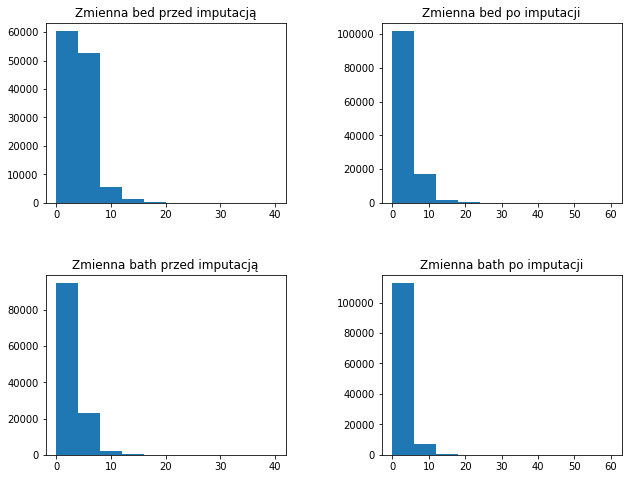

In [22]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (10,5))

ax1.hist(df_with_na.bed, range=[0,40])
ax1.set_title('Zmienna bed przed imputacją')
ax2.hist(df_no_na.bed, range = [0,60])
ax2.set_title('Zmienna bed po imputacji')
      
ax3.hist(df_with_na.bath, range=[0,40])
ax3.set_title('Zmienna bath przed imputacją')
ax4.hist(df_no_na.bath, range = [0,60])
ax4.set_title('Zmienna bath po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Powyżej przedstawiony został rozkład dla zmiennej bed oraz bath przed oraz po imputacji wartości poprzez symulację. Jak możemy zauważyć rozkłady obu zmiennych widocznie się zmieniły poprzez zwiększenie się liczby wystąpień wartości mniejszych niż w realnych wynikach. Wyraźnie jest to widoczne dla zmiennej bed, gdzie większość wartości skupiła się w granicach 0-5. Dla zmiennej bath zwiększyła się liczebność 0-5 oraz zmniejszyła 5-10.

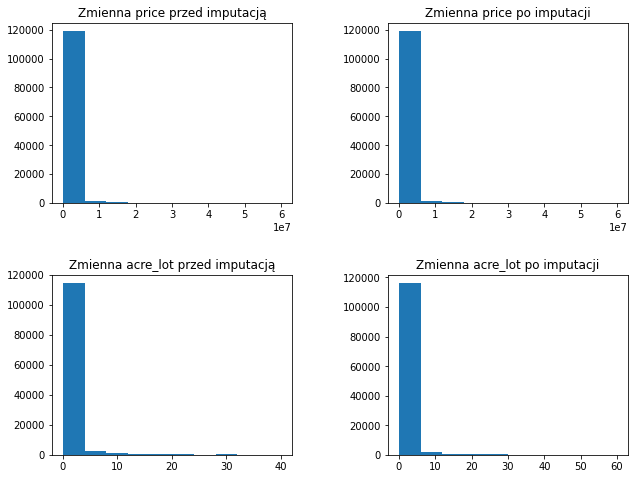

In [23]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (10,5))

ax1.hist(df_with_na.price)
ax1.set_title('Zmienna price przed imputacją')
ax2.hist(df_no_na.price)
ax2.set_title('Zmienna price po imputacji')
      
ax3.hist(df_with_na.acre_lot, range=[0,40])
ax3.set_title('Zmienna acre_lot przed imputacją')
ax4.hist(df_no_na.acre_lot, range = [0,60])
ax4.set_title('Zmienna acre_lot po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Powyżej przedstawione zostały rozkłady zmiennej price oraz acre_lot przed i po imputacji wartości procesem symulacji. Rozkład zmiennej price oraz acre_lot nie został mocno zmienienione. oznacza to, że większość wartości została przyporządkowana do poprawnych przedziałów, ale nie oznacza to, że wartości się pokrywają.

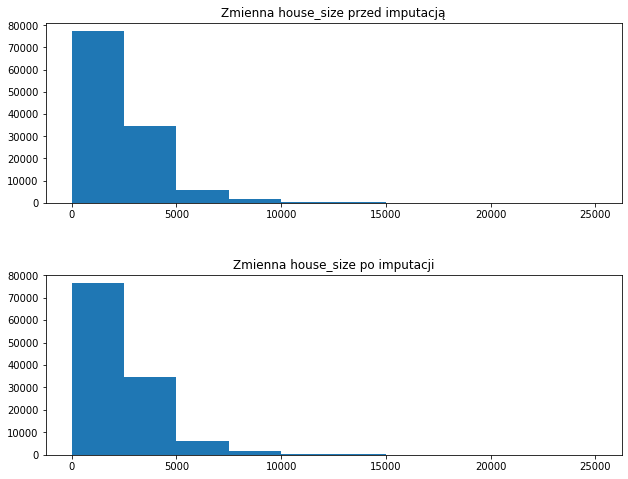

In [24]:
fig, ((ax1,ax2)) = plt.subplots(nrows = 2,
                                          ncols = 1,
                                          figsize = (10,5))

ax1.hist(df_with_na.house_size, range=[0,25000])
ax1.set_title('Zmienna house_size przed imputacją')
ax2.hist(df_no_na.house_size, range = [0,25000])
ax2.set_title('Zmienna house_size po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Ostatni histogram odnosi się do rozkładu zmiennej house_size. Ponownie widać, że wartości pod względem przedziałów zostały zasymulowane w sposób poprawny. Niemniej jednak średni błąd wartości wynosił około -400, dlatego musimy być świadomi wystepowania znacznych błędów symulacji.

Podsumowując symulacje, przedstawione zostało porównanie wyników realnych z zasymulowanymi dla brakujących danych. Jak możemy zauważyć symulacja oparta na losowej wartości dla percentyli od 30-97% przynosi bardzo słabe efekty pod względem poprawności wyników. Niemniej jednak jest to symulacja przeprowadzona na danych, które nie zostały wyczyszczone. W przypadku takiej symulacji wymagane by było przeprowadzenie odpowiedniego czyszczenia danych poprzez odrzucenie wartości odstających, co doporowadziło by do innych przedziałów losowania wartości dla percentyli 30-97%.

# Imputacja danych

Celem tej części pracy jest wykorzystanie różnych metod statystycznych w celu poprawnego uzupełnienia brakujących danych dla naszych zmiennych liczbowych. W niniejszej części będę prezentował możliwości zastosowania wybranych metod oraz opisywał ich wpływ na wyniki zbioru danych

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [26]:
df = pd.read_excel('real_estate_USA.xlsx')

In [27]:
#Usunięcie zmiennych, które nie są potrzebne w analizie danych
df = df[['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'house_size']]

In [28]:
#Nasz zbiór danych z brakami
df

,status,price,bed,bath,acre_lot,full_address,street,city,state,house_size
0,for_sale,105000,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,920.0
1,for_sale,80000,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,1800.0
4,for_sale,65000,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,NaN
...,...,...,...,...,...,...,...,...,...,...
202984,for_sale,1995000,1.0,1.0,0.05,"1 Lowell Pl, Nantucket, MA, 02554",1 Lowell Pl,Nantucket,Massachusetts,700.0
202985,for_sale,3495000,6.0,5.0,1.22,"35 Pine Crest Dr, Nantucket, MA, 02554",35 Pine Crest Dr,Nantucket,Massachusetts,5302.0
202986,for_sale,2400000,NaN,1.0,0.08,"584 Main St, Chatham, MA, 02633",584 Main St,Chatham,Massachusetts,2328.0
202987,for_sale,2999000,3.0,4.0,0.36,"35 Whistler Ln, Chatham, MA, 02633",35 Whistler Ln,Chatham,Massachusetts,2314.0


**Liczba braków danych**

In [29]:
#Liczba braków danych dla różnych zmiennych
df.isna().sum()

status              0
price               0
bed             31101
bath            30229
acre_lot        52038
full_address        0
street              0
city                0
state               0
house_size      29610
dtype: int64

In [30]:
#Procentowy udział braku danych w liczbie zmiennych

feature = df.columns

for i in feature:
    
    print(f'Brak danych dla zmiennej {i} wynosi: {df[i].isna().sum()/203125} %')
    
 

Brak danych dla zmiennej status wynosi: 0.0 %
Brak danych dla zmiennej price wynosi: 0.0 %
Brak danych dla zmiennej bed wynosi: 0.15311261538461537 %
Brak danych dla zmiennej bath wynosi: 0.14881969230769232 %
Brak danych dla zmiennej acre_lot wynosi: 0.2561870769230769 %
Brak danych dla zmiennej full_address wynosi: 0.0 %
Brak danych dla zmiennej street wynosi: 0.0 %
Brak danych dla zmiennej city wynosi: 0.0 %
Brak danych dla zmiennej state wynosi: 0.0 %
Brak danych dla zmiennej house_size wynosi: 0.1457723076923077 %


Widaż, iż najwyższa wartość braku danych jest dla zmiennej acre_lot. Potem w okolicach 15% dla zmiennej bed, house_size, bath.

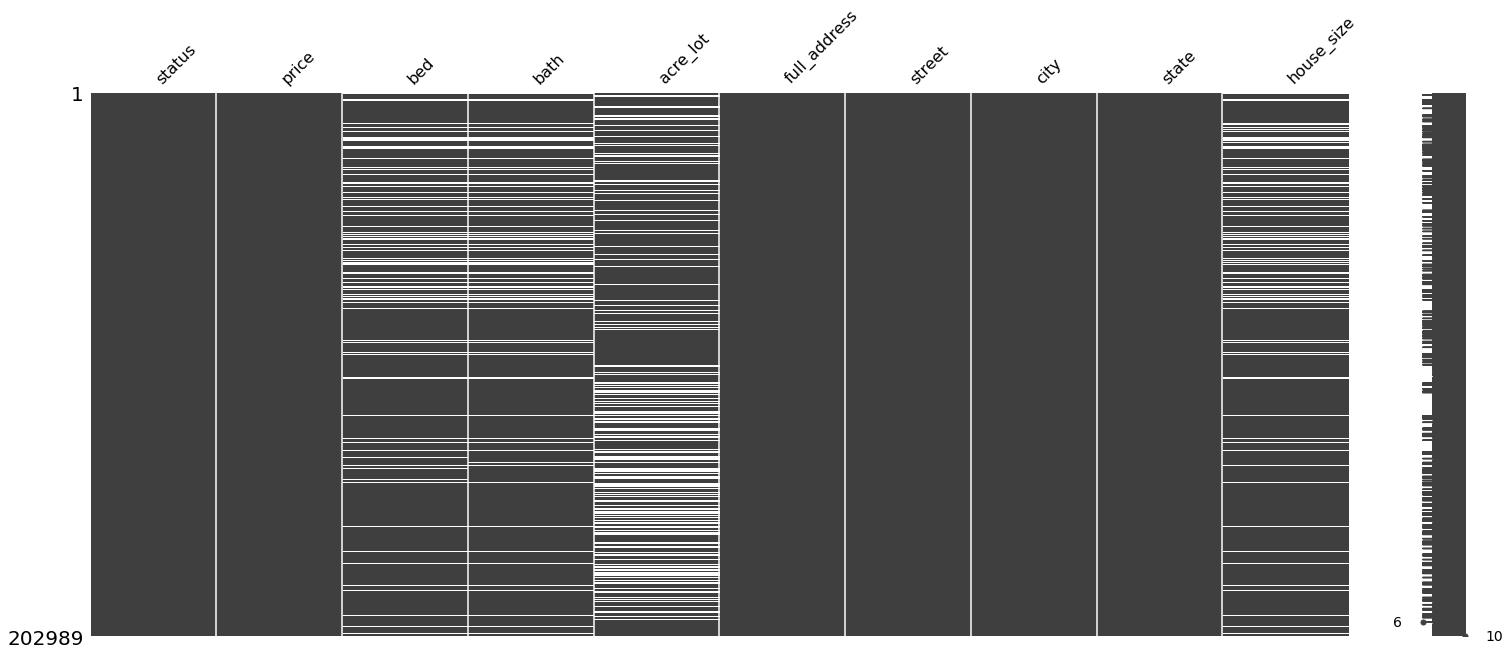

In [31]:
import missingno as msno

ax = msno.matrix(df)

Powyższa grafika służy przedstawieniu w sposób wizualny występowanie braków danych dla różnych zmiennych. Im większa jest ilość kresk białych w czarnym pasie tym więcej jest braków występujących dla danej zmiennej.

In [32]:
#Procentowy udział braku danych w liczbie zmiennych

feature = df.columns

for i in feature:
    
    print(f'Brak danych dla zmiennej {i} wynosi: {df[i].isna().sum()/203125} %')

Brak danych dla zmiennej status wynosi: 0.0 %
Brak danych dla zmiennej price wynosi: 0.0 %
Brak danych dla zmiennej bed wynosi: 0.15311261538461537 %
Brak danych dla zmiennej bath wynosi: 0.14881969230769232 %
Brak danych dla zmiennej acre_lot wynosi: 0.2561870769230769 %
Brak danych dla zmiennej full_address wynosi: 0.0 %
Brak danych dla zmiennej street wynosi: 0.0 %
Brak danych dla zmiennej city wynosi: 0.0 %
Brak danych dla zmiennej state wynosi: 0.0 %
Brak danych dla zmiennej house_size wynosi: 0.1457723076923077 %


Dane, które będą imputować w naszym zbiorze danych to zmienne liczbowe: bed, bath, acre_lot oraz house_size

**Imputacja wartością średnią**

Pierwszą metodą imputacji będzie uzupełnienie brakujących zmiennych wartościami średnimi dla wybranej kolumny. Jest to jedna z najprostszych metod imputacji danych. Ta metoda może być stosowana dla zmiennych przedstawianych w formie skali ilościowej oraz porządkowej. Największą zaletą tej metody jest jej prostota. Niestety cechuje się ona wieloma wadami w postaci np. dużej częstości jednej wartości dla zmiennej ciągłej.

In [33]:
df.describe()

,price,bed,bath,acre_lot,house_size
count,2.029890e+05,171888.000000,172760.000000,150951.000000,1.733790e+05
mean,8.685731e+05,3.534406,2.619935,8.727829,2.234515e+03
std,1.434062e+06,2.697086,2.939548,634.875814,4.222224e+03
min,1.000000e+00,1.000000,1.000000,0.000000,1.000000e+02
25%,2.499000e+05,2.000000,2.000000,0.130000,1.152000e+03
50%,5.199000e+05,3.000000,2.000000,0.330000,1.727000e+03
75%,8.899000e+05,4.000000,3.000000,1.140000,2.634000e+03
max,6.000000e+07,99.000000,198.000000,100000.000000,1.450112e+06


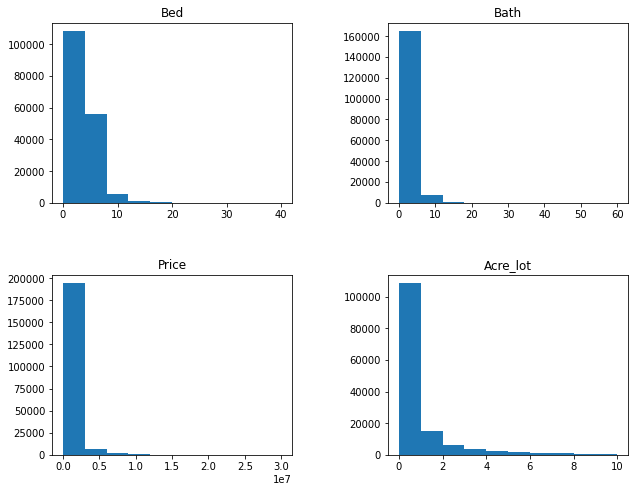

In [34]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (10,5))

ax1.hist(df.bed, range=[0,40])
ax1.set_title('Bed')
ax2.hist(df.bath, range = [0,60])
ax2.set_title('Bath')
ax3.hist(df.price, range = [0,30000000])
ax3.set_title('Price')
ax4.hist(df.acre_lot, range = [0,10])
ax4.set_title('Acre_lot')

fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

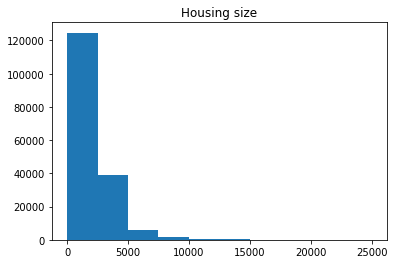

In [35]:
a =plt.hist(df.house_size, range = [0,25000])
a =plt.title('Housing size')


*Powyżej przedstawione zostały aktualne rozkłady dla wszystkich naszych zmiennych branych do badania. W celu lepszej jakościowo prezentacji, wartości na skali x zostały zmniejszone do najczęściej występujących wartości.*

In [36]:
#proces imputacji wartości średniej

df2 = df[['price', 'bed', 'bath', 'acre_lot' ,'house_size']]


In [37]:
df3= df2.apply(lambda x: x.fillna(x.mean()),axis=0)

In [38]:
df2.isna().sum()

price             0
bed           31101
bath          30229
acre_lot      52038
house_size    29610
dtype: int64

In [39]:
df3.isna().sum()

price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

In [40]:
#Null został zastąpiony wartością średnią
#Czas na describe

display(df2.describe(), df3.describe())


,price,bed,bath,acre_lot,house_size
count,2.029890e+05,171888.000000,172760.000000,150951.000000,1.733790e+05
mean,8.685731e+05,3.534406,2.619935,8.727829,2.234515e+03
std,1.434062e+06,2.697086,2.939548,634.875814,4.222224e+03
min,1.000000e+00,1.000000,1.000000,0.000000,1.000000e+02
25%,2.499000e+05,2.000000,2.000000,0.130000,1.152000e+03
50%,5.199000e+05,3.000000,2.000000,0.330000,1.727000e+03
75%,8.899000e+05,4.000000,3.000000,1.140000,2.634000e+03
max,6.000000e+07,99.000000,198.000000,100000.000000,1.450112e+06


,price,bed,bath,acre_lot,house_size
count,2.029890e+05,202989.000000,202989.000000,202989.000000,2.029890e+05
mean,8.685731e+05,3.534406,2.619935,8.727829,2.234515e+03
std,1.434062e+06,2.481882,2.711851,547.482396,3.902142e+03
min,1.000000e+00,1.000000,1.000000,0.000000,1.000000e+02
25%,2.499000e+05,2.000000,2.000000,0.190000,1.232000e+03
50%,5.199000e+05,3.000000,2.000000,0.770000,1.978000e+03
75%,8.899000e+05,4.000000,3.000000,8.727829,2.443000e+03
max,6.000000e+07,99.000000,198.000000,100000.000000,1.450112e+06


Powyżej przedstawione zostały wartości podstawowych statystyk opisowych dla tabeli posiadającej braki danych oraz dla tabeli z zaimputowanymi metodą wartości średnich (tabela poniżej). Jak widać odchylenie standardowe zmniejszyło się dla większości zmiennych, a najbardziej dla zmiennej acre_lot, co jest dobrym rezultatem, ale też do przewidzenia, gdyż zmniejszyła się odległość od średniej dla wartości. Reszta statystyk również znacząco się zmniejszyła np. percentyle, co wynika z dołożenia dużej ilości tych samych wartości.

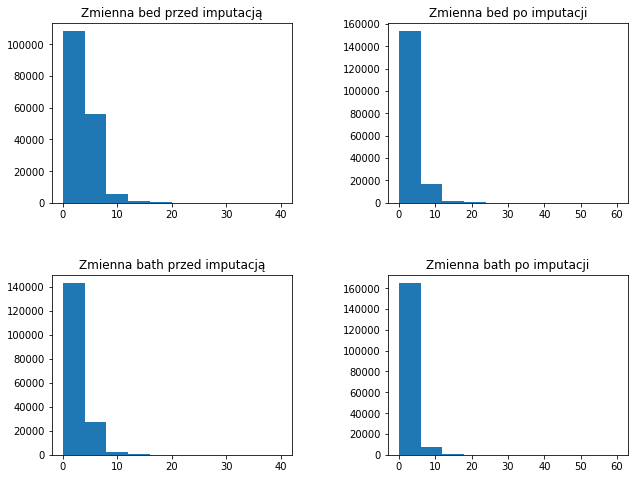

In [41]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (10,5))

ax1.hist(df.bed, range=[0,40])
ax1.set_title('Zmienna bed przed imputacją')
ax2.hist(df2.bed, range = [0,60])
ax2.set_title('Zmienna bed po imputacji')
      
ax3.hist(df.bath, range=[0,40])
ax3.set_title('Zmienna bath przed imputacją')
ax4.hist(df2.bath, range = [0,60])
ax4.set_title('Zmienna bath po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Wykresy rozkładu zmiennej w formie histogramu, wskazują powyżej, że zarówno dla zmiennej bed oraz bath doszło do zwiększenia lewostronności poprzez skumulowanie wartości średnich o niskich wynikach.

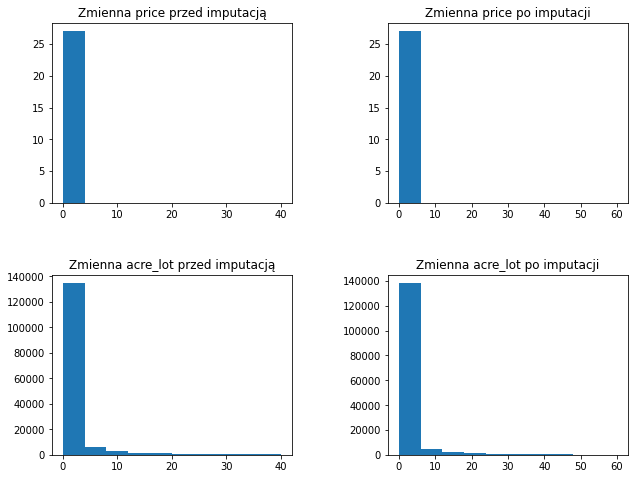

In [42]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (10,5))

ax1.hist(df.price, range=[0,40])
ax1.set_title('Zmienna price przed imputacją')
ax2.hist(df2.price, range = [0,60])
ax2.set_title('Zmienna price po imputacji')
      
ax3.hist(df.acre_lot, range=[0,40])
ax3.set_title('Zmienna acre_lot przed imputacją')
ax4.hist(df2.acre_lot, range = [0,60])
ax4.set_title('Zmienna acre_lot po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Dla zmiennych price oraz acre_lot nie doszło do znaczących zmian pod względem rozkładu.

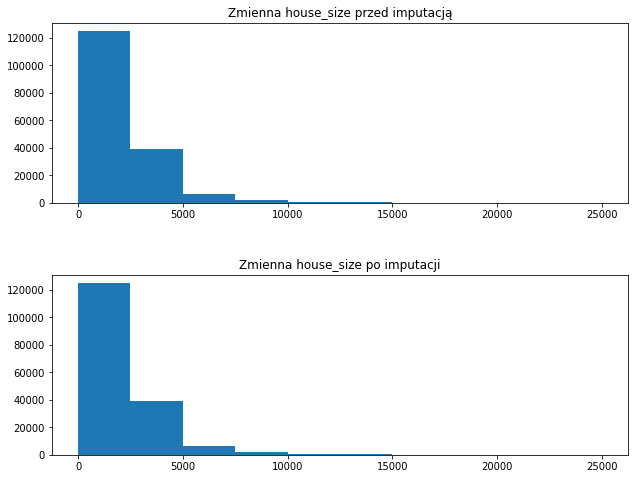

In [43]:
fig, ((ax1,ax2)) = plt.subplots(nrows = 2,
                                          ncols = 1,
                                          figsize = (10,5))

ax1.hist(df.house_size, range=[0,25000])
ax1.set_title('Zmienna house_size przed imputacją')
ax2.hist(df2.house_size, range = [0,25000])
ax2.set_title('Zmienna house_size po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Zmienna house_size po imputacji również nie wskazała na znaczące zmiany w wynikach po imputacji wartością średnią dla rozkładu wartości

**Imputacja medianą**

Kolejną bardzo prostą metodą jest imputacja wartości brakujących wynikiem mediany. Mediana jest to wartość środkowa w szeregu uporządkowanym. Metoda ta podobnie jak imputacja średnią jako wartość dodaną może przyjmować swoją prostotę, niestety nie jest zbyt precyzyjna i może dostarczać kłopotów statystyczych w dalszych etapach analizy.

In [44]:
#Proces imutacji wartości mediany

df3 = df2.apply(lambda x: x.fillna(x.median()),axis=0)

In [45]:
display(df.describe(), df2.describe(), df3.describe())

,price,bed,bath,acre_lot,house_size
count,2.029890e+05,171888.000000,172760.000000,150951.000000,1.733790e+05
mean,8.685731e+05,3.534406,2.619935,8.727829,2.234515e+03
std,1.434062e+06,2.697086,2.939548,634.875814,4.222224e+03
min,1.000000e+00,1.000000,1.000000,0.000000,1.000000e+02
25%,2.499000e+05,2.000000,2.000000,0.130000,1.152000e+03
50%,5.199000e+05,3.000000,2.000000,0.330000,1.727000e+03
75%,8.899000e+05,4.000000,3.000000,1.140000,2.634000e+03
max,6.000000e+07,99.000000,198.000000,100000.000000,1.450112e+06


,price,bed,bath,acre_lot,house_size
count,2.029890e+05,171888.000000,172760.000000,150951.000000,1.733790e+05
mean,8.685731e+05,3.534406,2.619935,8.727829,2.234515e+03
std,1.434062e+06,2.697086,2.939548,634.875814,4.222224e+03
min,1.000000e+00,1.000000,1.000000,0.000000,1.000000e+02
25%,2.499000e+05,2.000000,2.000000,0.130000,1.152000e+03
50%,5.199000e+05,3.000000,2.000000,0.330000,1.727000e+03
75%,8.899000e+05,4.000000,3.000000,1.140000,2.634000e+03
max,6.000000e+07,99.000000,198.000000,100000.000000,1.450112e+06


,price,bed,bath,acre_lot,house_size
count,2.029890e+05,202989.000000,202989.000000,202989.000000,2.029890e+05
mean,8.685731e+05,3.452527,2.527615,6.574972,2.160484e+03
std,1.434062e+06,2.489335,2.720817,547.494674,3.906252e+03
min,1.000000e+00,1.000000,1.000000,0.000000,1.000000e+02
25%,2.499000e+05,2.000000,2.000000,0.190000,1.232000e+03
50%,5.199000e+05,3.000000,2.000000,0.330000,1.727000e+03
75%,8.899000e+05,4.000000,3.000000,0.730000,2.443000e+03
max,6.000000e+07,99.000000,198.000000,100000.000000,1.450112e+06


Powyżej przedstawione zostały wyniki wartości statystyk podstawowych dla zbioru danych składającego się z brakujących danych (pierwsza tabela), dla zbioru po imputacji metodą średnich wartości (druga tabela) oraz na koniec jest tabela po imputacji wartościami mediany.
Jak możemy zauważyć po uzupełnieniu braków wartościami mediany doszło do znaczącego spadku wartości średniej w kolumnach. Dodatkowo znaczącej zmianie uległa wartość 75% percentyli, która spadła dla zmiennej acre_lot, podobnie dla zmiennej house_size.

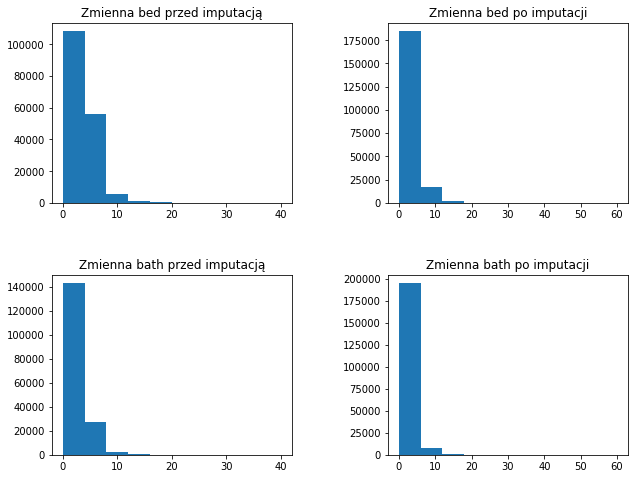

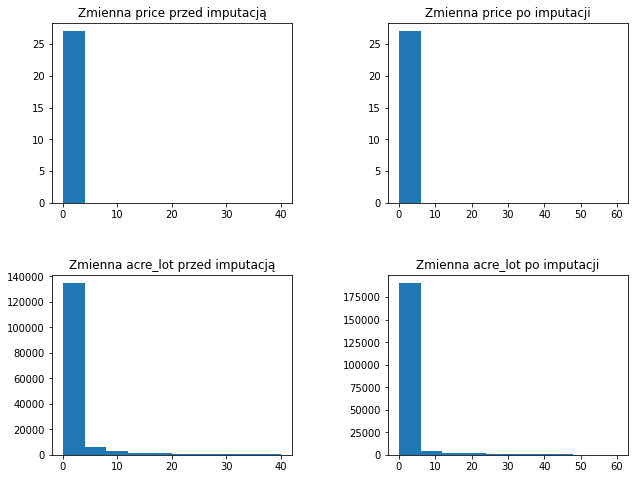

In [46]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (10,5))

ax1.hist(df.bed, range=[0,40])
ax1.set_title('Zmienna bed przed imputacją')
ax2.hist(df3.bed, range = [0,60])
ax2.set_title('Zmienna bed po imputacji')
      
ax3.hist(df.bath, range=[0,40])
ax3.set_title('Zmienna bath przed imputacją')
ax4.hist(df3.bath, range = [0,60])
ax4.set_title('Zmienna bath po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (10,5))

ax1.hist(df.price, range=[0,40])
ax1.set_title('Zmienna price przed imputacją')
ax2.hist(df3.price, range = [0,60])
ax2.set_title('Zmienna price po imputacji')
      
ax3.hist(df.acre_lot, range=[0,40])
ax3.set_title('Zmienna acre_lot przed imputacją')
ax4.hist(df3.acre_lot, range = [0,60])
ax4.set_title('Zmienna acre_lot po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Powyżej przedstawione zostały wykresy rozkładu wartości dla zmiennych przed oraz po imputacji wartością mediany. Zauważalne jest doprowadzenie do mocnej lewostronności rozkładu oraz zmniejszenia się wartości dla zmiennych.

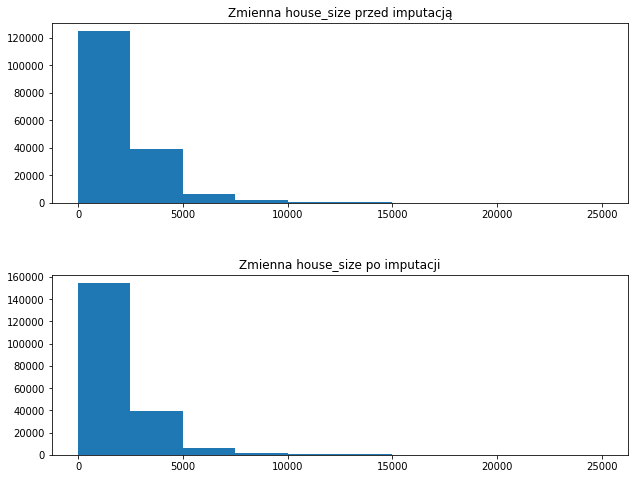

In [47]:
fig, ((ax1,ax2)) = plt.subplots(nrows = 2,
                                          ncols = 1,
                                          figsize = (10,5))

ax1.hist(df.house_size, range=[0,25000])
ax1.set_title('Zmienna house_size przed imputacją')
ax2.hist(df3.house_size, range = [0,25000])
ax2.set_title('Zmienna house_size po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

W przypadku zmiennej house_size po imputacji doszło do zmniejszenia kumulacji wartości w przedziale od 2500-5000.

**Imputacja regresją**

Następna metoda jaka zostanie użyta w celu imputacji danych różni się od poprzednich swoją bardziej statystyczną oraz prognostyczną formą. Metoda regresji jest jedną z najpopularniejszych metod imputacji danych. Jest ona bardzo dobra w przypadku występowania zależności między zmiennymi, niemniej jednak cechuje się problemami w postaci właśnie konieczności dobrze skorelowanych zmiennych, powoduje zwiększenie siły zależności między zmiennymi jak i też zmniejsza wariancję zmiennej objaśnianej.

,price,bed,bath,acre_lot,house_size
price,1.000000,0.277267,0.368687,0.008734,0.279257
bed,0.277267,1.000000,0.755947,-0.000678,0.300828
bath,0.368687,0.755947,1.000000,0.001918,0.268170
acre_lot,0.008734,-0.000678,0.001918,1.000000,0.041545
house_size,0.279257,0.300828,0.268170,0.041545,1.000000


<AxesSubplot:>

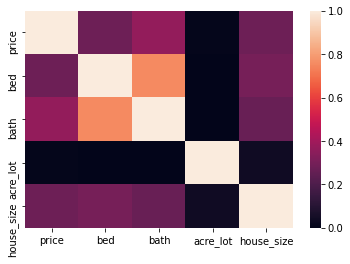

In [48]:
a = sns.heatmap(df2.corr())
display(df2.corr(),a )

Powyżej przedstawiona została w formie tabelarycznej oraz graficznej macierz korelacji. Jak możemy zauważyć jedyna istotna zależność występuje pomiędzy zmienną bed oraz bath, aż 0,76. Wskazuje nam to na to, że imputację przeprowadzić możemy jedynie na tych zmiennych, gdyż reszta nie ma żadnej relacji i predykcje byłyby na bardzo niskim poziomie.

In [49]:
#Część testowa
test_data = df2[df2['bed'].isnull()]

In [50]:
test_data

,price,bed,bath,acre_lot,house_size
42,400000,NaN,NaN,0.99,43082.0
43,380000,NaN,NaN,18.45,NaN
59,35000,NaN,NaN,0.88,NaN
60,58000,NaN,NaN,0.21,NaN
61,85000,NaN,NaN,21.08,NaN
...,...,...,...,...,...
202950,189000,NaN,NaN,1.03,NaN
202956,899000,NaN,NaN,0.35,NaN
202957,185000,NaN,NaN,1.19,NaN
202959,995000,NaN,NaN,0.23,NaN


In [51]:
test_data = test_data[test_data['bath'].notna()]
test_data = test_data[test_data['price'].notna()]
test_data = test_data[test_data['house_size'].notna()]
test_data = test_data[test_data['acre_lot'].notna()]

In [52]:
df2.dropna(inplace=True)
df2.isna().sum()

<ipython-input-52-ebe03e7ca968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

In [53]:
#Usunięcie wartości pustych ze zbioru danych
test_data.isna().sum()


price           0
bed           745
bath            0
acre_lot        0
house_size      0
dtype: int64

In [54]:
df4 = df2[df2['bath'].notna()]
df4 = df2[df2['price'].notna()]
df4 = df2[df2['house_size'].notna()]
df4 = df2[df2['acre_lot'].notna()]

In [55]:
y_train = df3['bed']

In [56]:
X_train = df3.drop('bed', axis = 1)

In [57]:
#Tworzenie modelu
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [59]:
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
#Cześć ucząca
X_test = test_data.drop('bed', axis = 1)

In [61]:
X_test

,price,bath,acre_lot,house_size
285,3000000,6.0,1.38,3000.0
527,3000000,6.0,1.38,3000.0
2607,3000000,6.0,1.38,3000.0
2991,3000000,6.0,1.38,3000.0
4317,3000000,6.0,1.38,3000.0
...,...,...,...,...
201573,10000,2.0,1.92,2716.0
202560,10000,2.0,1.92,2716.0
202781,2400000,1.0,0.08,2328.0
202830,180000,1.0,1.00,251.0


In [62]:
y_pred = lr.predict(X_test)

In [63]:
test_data.loc[test_data.bed.isnull(),'bed'] = y_pred

In [64]:
test_data

,price,bed,bath,acre_lot,house_size
285,3000000,5.773544,6.0,1.38,3000.0
527,3000000,5.773544,6.0,1.38,3000.0
2607,3000000,5.773544,6.0,1.38,3000.0
2991,3000000,5.773544,6.0,1.38,3000.0
4317,3000000,5.773544,6.0,1.38,3000.0
...,...,...,...,...,...
201573,10000,3.164774,2.0,1.92,2716.0
202560,10000,3.164774,2.0,1.92,2716.0
202781,2400000,2.378764,1.0,0.08,2328.0
202830,180000,2.319669,1.0,1.00,251.0


In [65]:
test_data['bed'] = test_data['bed'].apply(np.ceil)

In [66]:
test_data

,price,bed,bath,acre_lot,house_size
285,3000000,6.0,6.0,1.38,3000.0
527,3000000,6.0,6.0,1.38,3000.0
2607,3000000,6.0,6.0,1.38,3000.0
2991,3000000,6.0,6.0,1.38,3000.0
4317,3000000,6.0,6.0,1.38,3000.0
...,...,...,...,...,...
201573,10000,4.0,2.0,1.92,2716.0
202560,10000,4.0,2.0,1.92,2716.0
202781,2400000,3.0,1.0,0.08,2328.0
202830,180000,3.0,1.0,1.00,251.0


Jak widać nasze wartości zostały uzupełnione. Bardzo dużym problemem regresji jest uzupełnianie wartości brakującej na podstawie innych zmiennych zależnych, dlatego było to dość problematyczne w naszym przypadku. Zmienna najsilniej skorelowana ze zmienną bed posiadała prawie taką samą liczbę braków, dlatego finalnie uzupełnione metodą regresji mogły zostać tylko 745 wierszy. Wskazuje to na duże probelmy uzupełniania metodą regresji.

**Imputacja KNN**

Ostatnią metodą imputacji danych jest K-najbliższych sąsiadów. W największym uproszczeniu jest to metoda, która polega na zaklasyfikowaniu nowej wartości (w naszym przypadku wartości brakującej) pośród pewnej liczby znanych obiektów. W niniejszej pracy będziemy opierać się na liczbie 3 sąsiadujących wartości. 

In [67]:
df = df[['price', 'bed', 'bath', 'acre_lot' ,'house_size']]

In [68]:
df_cut = df[:50000]
df_cut2 = df[50000:100000]
df_cut3 = df[100000:150000]
df_cut4 = df[150000:200000]
df_cut5 = df[200000:]

In [69]:
from sklearn.impute import KNNImputer

In [70]:
impute_knn = KNNImputer(n_neighbors=3, weights = 'distance')
x= impute_knn.fit_transform(df_cut)
x

array([[1.050e+05, 3.000e+00, 2.000e+00, 1.200e-01, 9.200e+02],
       [8.000e+04, 4.000e+00, 2.000e+00, 8.000e-02, 1.527e+03],
       [6.700e+04, 2.000e+00, 1.000e+00, 1.500e-01, 7.480e+02],
       ...,
       [2.799e+05, 3.000e+00, 2.000e+00, 4.000e-01, 1.322e+03],
       [4.899e+05, 3.000e+00, 3.000e+00, 2.580e+00, 1.760e+03],
       [4.749e+05, 3.000e+00, 2.000e+00, 1.920e+00, 1.643e+03]])

In [71]:
impute_knn = KNNImputer(n_neighbors=3, weights = 'distance')
x1= impute_knn.fit_transform(df_cut2)
x1

array([[2.399e+05, 3.000e+00, 2.000e+00, 2.800e-01, 1.176e+03],
       [2.990e+05, 3.000e+00, 1.000e+00, 6.500e-01, 1.424e+03],
       [4.850e+05, 4.000e+00, 3.000e+00, 5.800e-01, 1.985e+03],
       ...,
       [5.400e+05, 2.000e+00, 2.000e+00, 1.080e+02, 1.525e+03],
       [2.099e+05, 3.000e+00, 2.000e+00, 2.100e-01, 1.388e+03],
       [2.749e+05, 2.000e+00, 2.000e+00, 2.355e+01, 1.278e+03]])

In [72]:
impute_knn = KNNImputer(n_neighbors=3, weights = 'distance')
x2= impute_knn.fit_transform(df_cut3)
x2

array([[1.149e+05, 2.000e+00, 1.000e+00, 8.100e-01, 6.720e+02],
       [3.299e+05, 3.000e+00, 1.000e+00, 1.320e+00, 1.092e+03],
       [3.750e+05, 2.000e+00, 2.000e+00, 4.800e-01, 1.180e+03],
       ...,
       [9.490e+05, 3.000e+00, 2.000e+00, 1.740e+00, 1.912e+03],
       [1.095e+06, 4.000e+00, 2.000e+00, 1.000e-01, 2.357e+03],
       [1.645e+06, 4.000e+00, 4.000e+00, 9.200e-01, 3.410e+03]])

In [73]:
impute_knn = KNNImputer(n_neighbors=3, weights = 'distance')
x3= impute_knn.fit_transform(df_cut4)
x3

array([[4.75000000e+06, 4.00000000e+00, 4.00000000e+00, 3.00000000e-02,
        4.40000000e+03],
       [7.99000000e+05, 1.00000000e+00, 1.00000000e+00, 3.69400000e+01,
        7.02000000e+02],
       [5.00000000e+05, 4.66666369e+00, 2.66667262e+00, 8.00000000e-02,
        1.72800263e+03],
       ...,
       [7.09500000e+05, 3.00000000e+00, 3.00000000e+00, 2.10000000e-01,
        1.87600000e+03],
       [7.08400000e+05, 3.00000000e+00, 2.00000000e+00, 1.80000000e-01,
        1.63200000e+03],
       [3.19900000e+05, 3.00000000e+00, 3.00000000e+00, 7.50000000e-01,
        1.86800000e+03]])

In [74]:
impute_knn = KNNImputer(n_neighbors=3, weights = 'distance')
x4= impute_knn.fit_transform(df_cut5)

In [75]:
df_1 = pd.DataFrame(x, columns=['price', 
                      'bed','bath','acre_lot',
                       'house_size'])
df_2 = pd.DataFrame(x1, columns=['price', 
                      'bed','bath','acre_lot',
                       'house_size'])
df_3 = pd.DataFrame(x2, columns=['price', 
                      'bed','bath','acre_lot',
                       'house_size'])
df_4 = pd.DataFrame(x3, columns=['price', 
                      'bed','bath','acre_lot',
                       'house_size'])
df_5 = pd.DataFrame(x4, columns=['price', 
                      'bed','bath','acre_lot',
                       'house_size'])

In [76]:
display(df_1,df_2,df_3,df_4,df_5)

,price,bed,bath,acre_lot,house_size
0,105000.0,3.0,2.0,0.12,920.0
1,80000.0,4.0,2.0,0.08,1527.0
2,67000.0,2.0,1.0,0.15,748.0
3,145000.0,4.0,2.0,0.10,1800.0
4,65000.0,6.0,2.0,0.05,2600.0
...,...,...,...,...,...
49995,499000.0,4.0,4.0,2.00,2532.0
49996,299999.0,3.0,2.0,0.33,1650.0
49997,279900.0,3.0,2.0,0.40,1322.0
49998,489900.0,3.0,3.0,2.58,1760.0


,price,bed,bath,acre_lot,house_size
0,239900.0,3.0,2.0,0.28,1176.0
1,299000.0,3.0,1.0,0.65,1424.0
2,485000.0,4.0,3.0,0.58,1985.0
3,139000.0,3.0,1.0,0.10,1428.0
4,239900.0,4.0,1.0,0.28,1200.0
...,...,...,...,...,...
49995,685000.0,3.0,3.0,9.38,1846.0
49996,739000.0,3.0,3.0,3.57,2700.0
49997,540000.0,2.0,2.0,108.00,1525.0
49998,209900.0,3.0,2.0,0.21,1388.0


,price,bed,bath,acre_lot,house_size
0,114900.0,2.0,1.0,0.81,672.0
1,329900.0,3.0,1.0,1.32,1092.0
2,375000.0,2.0,2.0,0.48,1180.0
3,629900.0,5.0,4.0,0.44,4666.0
4,395000.0,3.0,2.0,1.50,1549.0
...,...,...,...,...,...
49995,799000.0,1.0,1.0,0.02,705.0
49996,535000.0,1.0,1.0,0.70,475.0
49997,949000.0,3.0,2.0,1.74,1912.0
49998,1095000.0,4.0,2.0,0.10,2357.0


,price,bed,bath,acre_lot,house_size
0,4750000.0,4.000000,4.000000,0.03,4400.000000
1,799000.0,1.000000,1.000000,36.94,702.000000
2,500000.0,4.666664,2.666673,0.08,1728.002625
3,679000.0,1.000000,2.000000,0.20,900.000000
4,849900.0,2.000000,2.000000,0.13,1106.000000
...,...,...,...,...,...
49995,1098957.0,3.000000,3.000000,0.10,1960.000000
49996,1150076.0,3.000000,3.000000,0.10,2129.000000
49997,709500.0,3.000000,3.000000,0.21,1876.000000
49998,708400.0,3.000000,2.000000,0.18,1632.000000


,price,bed,bath,acre_lot,house_size
0,478000.0,3.000000,2.0,0.64,2437.0
1,392500.0,6.000000,3.0,0.33,1980.0
2,799900.0,4.000000,4.0,1.15,3628.0
3,350000.0,3.000000,1.0,0.22,1004.0
4,339900.0,3.000000,1.0,0.11,799.0
...,...,...,...,...,...
2984,1995000.0,1.000000,1.0,0.05,700.0
2985,3495000.0,6.000000,5.0,1.22,5302.0
2986,2400000.0,3.260353,1.0,0.08,2328.0
2987,2999000.0,3.000000,4.0,0.36,2314.0


In [77]:
df_5.isna().sum()

price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

In [78]:
frames = [df_1, df_2, df_3, df_4, df_5]

result = pd.concat(frames)

In [79]:
result

,price,bed,bath,acre_lot,house_size
0,105000.0,3.000000,2.0,0.12,920.0
1,80000.0,4.000000,2.0,0.08,1527.0
2,67000.0,2.000000,1.0,0.15,748.0
3,145000.0,4.000000,2.0,0.10,1800.0
4,65000.0,6.000000,2.0,0.05,2600.0
...,...,...,...,...,...
2984,1995000.0,1.000000,1.0,0.05,700.0
2985,3495000.0,6.000000,5.0,1.22,5302.0
2986,2400000.0,3.260353,1.0,0.08,2328.0
2987,2999000.0,3.000000,4.0,0.36,2314.0


In [80]:
result.isna().sum()

price         0
bed           0
bath          0
acre_lot      0
house_size    0
dtype: int64

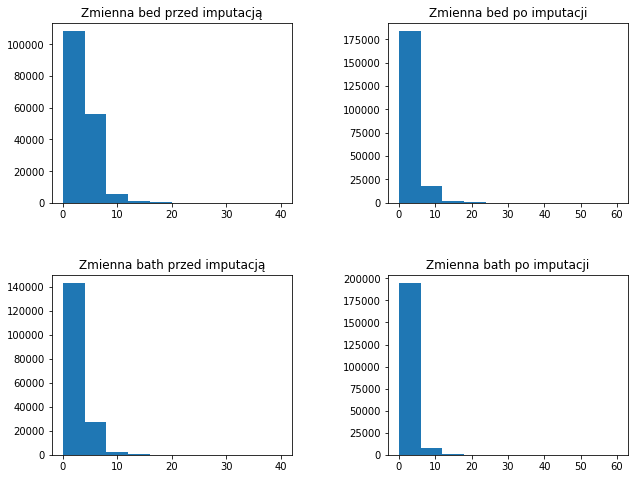

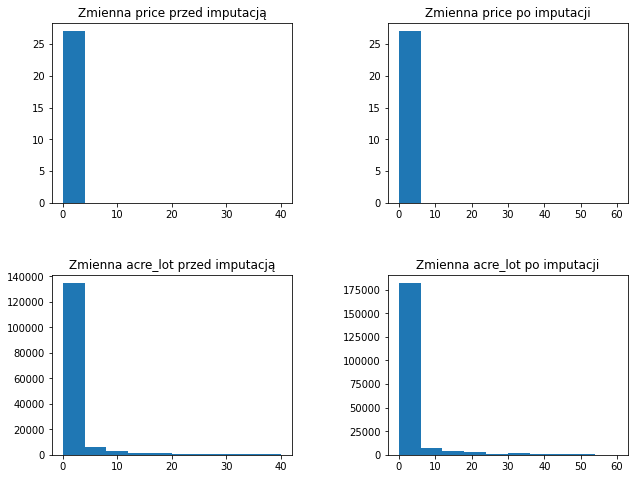

In [81]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (10,5))

ax1.hist(df.bed, range=[0,40])
ax1.set_title('Zmienna bed przed imputacją')
ax2.hist(result.bed, range = [0,60])
ax2.set_title('Zmienna bed po imputacji')
      
ax3.hist(df.bath, range=[0,40])
ax3.set_title('Zmienna bath przed imputacją')
ax4.hist(result.bath, range = [0,60])
ax4.set_title('Zmienna bath po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize = (10,5))

ax1.hist(df.price, range=[0,40])
ax1.set_title('Zmienna price przed imputacją')
ax2.hist(result.price, range = [0,60])
ax2.set_title('Zmienna price po imputacji')
      
ax3.hist(df.acre_lot, range=[0,40])
ax3.set_title('Zmienna acre_lot przed imputacją')
ax4.hist(result.acre_lot, range = [0,60])
ax4.set_title('Zmienna acre_lot po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Jak widać powyżej na rozkładach, metoda KNN w doraźny sposób zminimalizowała wartości. Dla wszystkich zmiennych ukazanych powyżej wartości zostały dostosowane w taki sposób, że wyraźnie wpłyneły na rozkład. 

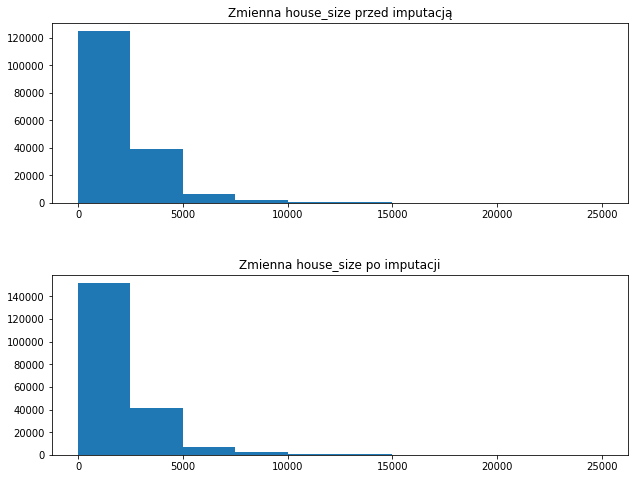

In [82]:
fig, ((ax1,ax2)) = plt.subplots(nrows = 2,
                                          ncols = 1,
                                          figsize = (10,5))

ax1.hist(df.house_size, range=[0,25000])
ax1.set_title('Zmienna house_size przed imputacją')
ax2.hist(result.house_size, range = [0,25000])
ax2.set_title('Zmienna house_size po imputacji')


fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

W przypadku zmiennej house_size większość wartości brakujących została zaklasyfikowana do przedziału wartości pomiędzy 0 a 2500 tys., co jest raczej dość poprawną predykcją ze względu na wcześniejszy układ zawierający braki.

# Podsumowanie

Celem powyższych rozważań było przedstawienie wybranych metod imputacji danych. Przedstawiona została metoda uzupełniania braków danych wartościami średnimi, medianą, regresją oraz metodą K-najbliższego sąsiada. Uważam, że najbardziej racjonalną formą uzupełniania braków jest użycie ostatniej metody KNN. Niemniej jednak jeśli występują oznaki występowania istotności pomiędzy zmiennymi to warto również spróbować metody regresji. W przypadku takich działań warto jest przed przeprowadzić symulację wartości brakujących by móc oszacować celność predykcji różnych metod. W niniejszej pracy w przypadku procesu imputacji
opierałem się na realnych brakach danych.